In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00


In [3]:
import os
import cv2
import torch
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
from glob import glob
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import jaccard_score, accuracy_score

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
DATASET_PATH = "/content/drive/MyDrive/Mouth Detection Dataset"

In [5]:
yaml_content = f"""
path: {DATASET_PATH}  # dataset root
train: images/train   # train images
val: images/valid       # validation images
test: images/test     # test images (optional, for evaluation)

# Number of classes
nc: 1  # <--- change to your number of classes

# Class names
names: ['ips']  # <--- replace with your class names
"""

with open("dataset.yaml", "w") as f:
    f.write(yaml_content)

print("dataset.yaml created ✅")

dataset.yaml created ✅


In [7]:
model = YOLO("yolov8n.pt")
model.train(
    data="dataset.yaml",
    epochs=50,          # number of epochs
    imgsz=640,          # image size
    batch=16,           # batch size
    workers=2,
    project='/content/drive/MyDrive/Mouth_Detection_YOLOv8',
    name='Mouth_Detection'
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Mouth_Detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f67752a20f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
metrics = model.val(split='test', verbose=False)

# Access detection (bounding box) metrics
box = metrics.box

print("Object Detection Metrics (Test Set):")
print(f"Precision:     {box.mp:.4f}")
print(f"Recall:        {box.mr:.4f}")
print(f"mAP@0.5:       {box.map50:.4f}")
print(f"mAP@0.5:0.95:  {box.map:.4f}")

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.1 MB/s, size: 35.8 KB)
val: Scanning /content/drive/MyDrive/Mouth Detection Dataset/labels/test... 129 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129 2.4it/s 53.4s
val: New cache created: /content/drive/MyDrive/Mouth Detection Dataset/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 2.9it/s 3.1s
                   all        129        129      0.999      0.992      0.995      0.691
Speed: 3.0ms preprocess, 5.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/drive/MyDrive/Mouth_Detection_YOLOv8/Mouth_Detection2
Object Detection Metrics (Test Set):
Precision:     0.9991
Recall:        0.9922
mAP@0.5:       0.9950
mAP@0.5:0.95:  0.6909


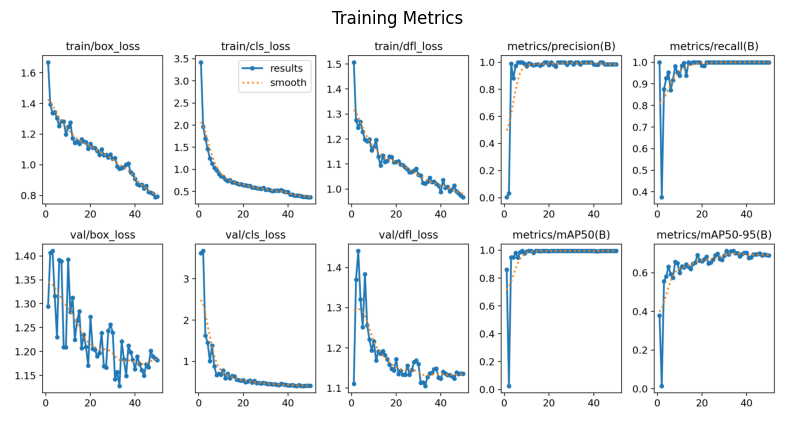

In [9]:
# Display Training Metrics
image_path = '/content/drive/MyDrive/Mouth_Detection_YOLOv8/Mouth_Detection/results.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Training Metrics")
plt.show()

In [10]:
# Path to test images and labels
test_images_dir = os.path.join(DATASET_PATH, "images/test")
test_labels_dir = os.path.join(DATASET_PATH, "labels/test")

# Get five random test images
test_images = random.sample(os.listdir(test_images_dir), 5)

# Class names from dataset.yaml
class_names = ['lips']  # <-- update with your classes

def load_labels(label_path):
    """Load YOLO format labels [class, x_center, y_center, w, h]"""
    labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                c, x, y, w, h = map(float, line.strip().split())
                labels.append((int(c), x, y, w, h))
    return labels

def draw_boxes(image, labels, color=(0, 255, 0), is_pred=False):
    """Draw bounding boxes on image"""
    h, w, _ = image.shape
    for label in labels:
        c, x, y, bw, bh = label
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        text = f"{class_names[c]}" + (" (pred)" if is_pred else "")
        cv2.putText(image, text, (x1, max(20, y1-10)), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, color, 2)
    return image

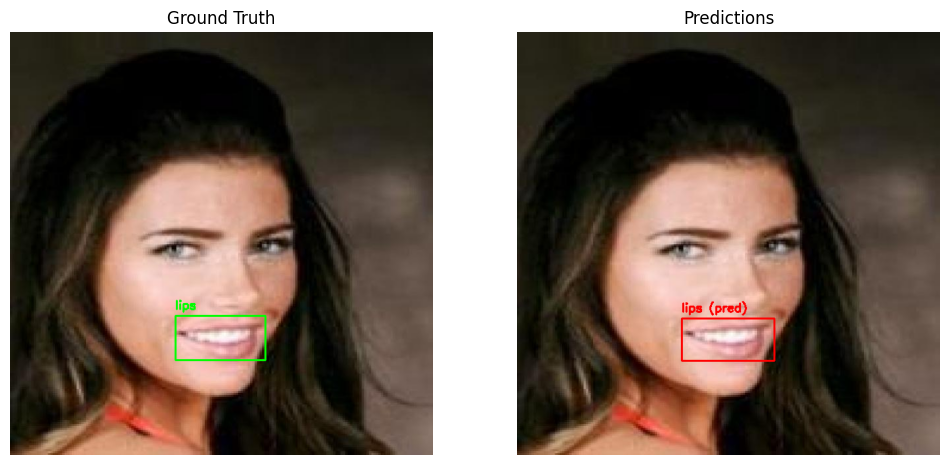

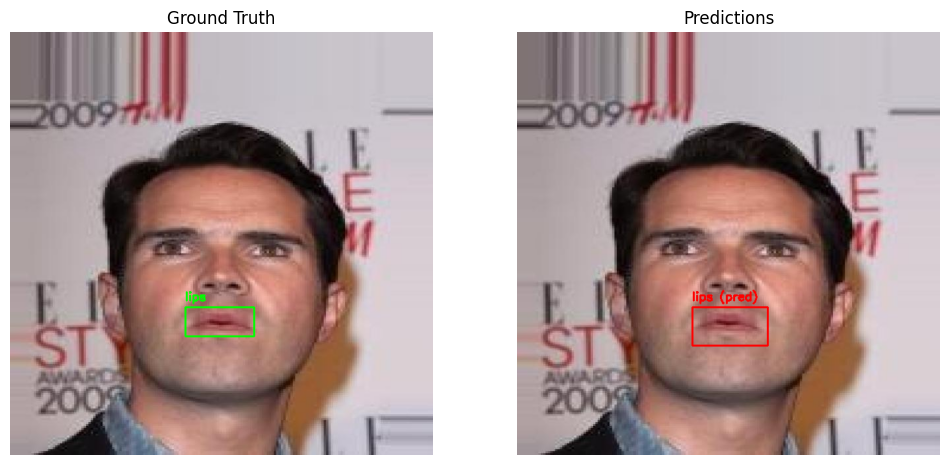

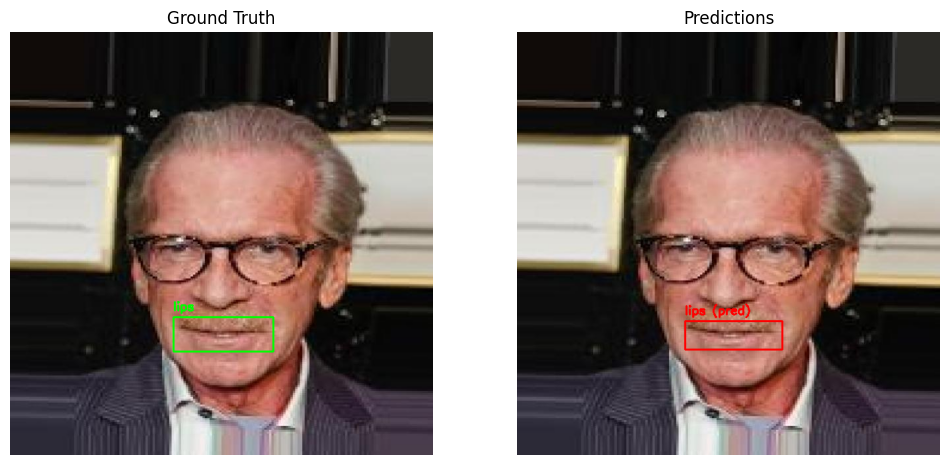

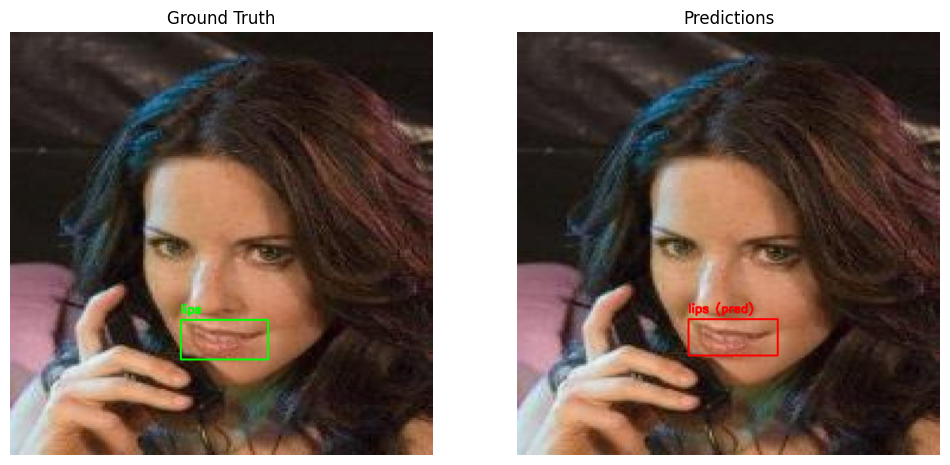

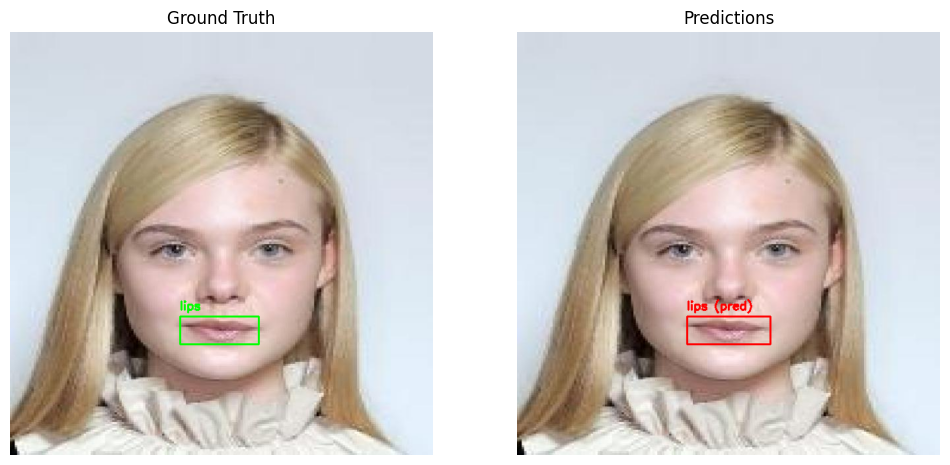

In [11]:
# Display 5 random test images with GT and predictions
for img_file in test_images:
    img_path = os.path.join(test_images_dir, img_file)
    label_path = os.path.join(test_labels_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

    # Load image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load ground truth labels
    gt_labels = load_labels(label_path)

    # Run inference
    results = model(img_rgb, verbose=False)
    pred_labels = []
    for r in results:
        for box in r.boxes:
            c = int(box.cls)
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            # Convert xyxy -> YOLO format for consistency with draw function
            bw = (x2 - x1) / img.shape[1]
            bh = (y2 - y1) / img.shape[0]
            x = (x1 + x2) / (2 * img.shape[1])
            y = (y1 + y2) / (2 * img.shape[0])
            pred_labels.append((c, x, y, bw, bh))

    # Draw GT and predictions
    img_gt = draw_boxes(img_rgb.copy(), gt_labels, color=(0, 255, 0))   # green
    img_pred = draw_boxes(img_rgb.copy(), pred_labels, color=(255, 0, 0), is_pred=True)  # red

    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gt)
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_pred)
    plt.title("Predictions")
    plt.axis("off")

    plt.show()

In [16]:
# After evaluation
metrics = model.val(split="test", verbose=False)
box = metrics.box
# Per-class AP@0.5
print("📊 Per-Class AP@0.5 (IoU ≥ 0.5):")
for i, ap in enumerate(box.ap50):
    print(f"{class_names[i]}: {ap:.4f}")

# Per-class AP@0.5:0.95
print("\n📊 Per-Class AP@0.5:0.95 (IoU 0.5-0.95):")
for i, ap in enumerate(box.ap):
    print(f"{class_names[i]}: {ap:.4f}")

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 18.6±4.7 MB/s, size: 28.8 KB)
val: Scanning /content/drive/MyDrive/Mouth Detection Dataset/labels/test.cache... 129 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129 239.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.0it/s 3.0s
                   all        129        129      0.999      0.992      0.995      0.691
Speed: 4.1ms preprocess, 4.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/Mouth_Detection_YOLOv8/Mouth_Detection6
📊 Per-Class AP@0.5 (IoU ≥ 0.5):
lips: 0.9950

📊 Per-Class AP@0.5:0.95 (IoU 0.5-0.95):
lips: 0.6909


In [19]:
# Function to load YOLO-format labels
def load_labels(label_path, img_w, img_h):
    labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                c, x, y, w, h = map(float, line.strip().split())
                # Convert to absolute xyxy format
                x1 = int((x - w/2) * img_w)
                y1 = int((y - h/2) * img_h)
                x2 = int((x + w/2) * img_w)
                y2 = int((y + h/2) * img_h)
                labels.append((int(c), x1, y1, x2, y2))
    return labels

# Function to compute IoU between two boxes
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    union = float(boxAArea + boxBArea - interArea)

    return interArea / union if union > 0 else 0

# Pick 3 random test images
test_images = random.sample(os.listdir(test_images_dir), 3)

for img_file in test_images:
    img_path = os.path.join(test_images_dir, img_file)
    label_path = os.path.join(test_labels_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Could not read image: {img_file}")
        continue
    h, w, _ = img.shape

    # Load ground truth labels
    gt_boxes = load_labels(label_path, w, h)

    # Run inference
    results = model(img, verbose=False)

    print(f"\n📷 Image: {img_file}")
    for r in results:
        if len(r.boxes) == 0:
            print(" No predictions.")
            continue

        pred_boxes = []
        for box in r.boxes:
            cls = int(box.cls)
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            pred_boxes.append((cls, x1, y1, x2, y2))

        # Compute IoU for each prediction vs. GT
        for pi, (pc, px1, py1, px2, py2) in enumerate(pred_boxes):
            best_iou = 0
            best_gt_class = None
            for gc, gx1, gy1, gx2, gy2 in gt_boxes:
                iou = compute_iou((px1, py1, px2, py2), (gx1, gy1, gx2, gy2))
                if iou > best_iou:
                    best_iou = iou
                    best_gt_class = gc

            if best_gt_class is not None:
                print(f" Pred {pi+1}: {class_names[pc]} | Best match GT={class_names[best_gt_class]} | IoU={best_iou:.4f}")
            else:
                print(f" Pred {pi+1}: {class_names[pc]} | No matching GT box | IoU=0.0000")


📷 Image: 000281_jpg.rf.6294de36a14f7816fa469f9125cf9fcb.jpg
 Pred 1: lips | Best match GT=lips | IoU=0.6677

📷 Image: 000132_jpg.rf.65e5e9bdf85c16447a42523c68a18457.jpg
 Pred 1: lips | Best match GT=lips | IoU=0.8977

📷 Image: 000551_jpg.rf.50cc0b92b238e1efa0d80a02fea8ec23.jpg
 Pred 1: lips | Best match GT=lips | IoU=0.9197
